In [163]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)
from reformat_column import format_number
import seaborn as sns

# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)


['Views', 'Likes', 'Most Streamed Spotify Songs 202']


##### Data Cleaning and Setup

In [62]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

# Specifying  columns that we're using for the purposes of our study
most_streamed_df = most_streamed_df[["Track",	
"Album Name",
"Artist",
"Release Date",
"All Time Rank",	
"Spotify Streams",	
"Spotify Playlist Count",
"Spotify Playlist Reach",	
"Spotify Popularity",
"YouTube Views",
"YouTube Likes",
"TikTok Posts",
"TikTok Likes",	
"TikTok Views",	
"YouTube Playlist Reach",
"Explicit Track"]]
most_streamed_df.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,0
4,Houdini,Houdini,Eminem,2024-05-31,5,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,1


In [63]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)
most_streamed_df.rename(columns={'Track': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
complete_views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]
youtube_views_df = views_df[['Song', 'Sum of YouTube Views', 'Sum of TikTok Views']]

likes_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0
1,Love You So,1.842270e+10,122780.0
2,Oh No,4.959549e+09,466425.0
3,Spongebob,3.607885e+09,NaN
4,Funny Song,3.510270e+09,230150.0


In [64]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Spongebob,3.607885e+09,NaN,NaN,3356,902103.0,NaN,3.335940e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10


In [110]:
# Remove rows with missing values
merged_df.dropna(inplace=True)

# Define the columns you want to format
columns_to_format = ['Sum of TikTok Likes', 'Sum of YouTube Likes', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10
5,Aesthetic,3.206991e+09,175081.0,44.0,114,33025746.0,6658234.0,3.985063e+10


In [ ]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)
most_streamed_df = most_streamed_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']
top_25_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(25)
top_10_tiktok_df = top_25_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 500 TikTok-viewed songs with their Spotify Streams
# top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]

# Display top 25 TikTok-viewed songs with their Spotify Streams
# top_25_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]

# Display top 10 TikTok-viewed songs with their Spotify Streams
# top_10_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]


# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df.style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

formatted_top_25_df = top_25_tiktok_df.style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

formatted_top_10_df = top_10_tiktok_df[['Song', 'Sum of TikTok Views',
                                           'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']].style.format({
    'Sum of TikTok Likes': '{:,.0f}',
    'Sum of YouTube Likes': '{:,.0f}',
    'Sum of Spotify Streams': '{:,.0f}',
    'Sum of YouTube Views': '{:,.0f}',
    'Sum of TikTok Views': '{:,.0f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

top_500_tiktok_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10
5,Aesthetic,3.206991e+09,175081.0,44.0,114,33025746.0,6658234.0,3.985063e+10


##### Correlation Analysis

**Objective**: Compute correlation coefficients between TikTok likes and YouTube views, Spotify streams, and other relevant metrics.

**Interpretation**: The resulting matrix will show the correlation coefficients between TikTok likes and the other metrics. Values close to 1 or -1 indicate strong correlations, while values near 0 suggest weak or no correlation.

In [90]:
# df = top_500_tiktok_df[['Sum of TikTok Likes', 'Sum of YouTube Views']]
df = top_500_tiktok_df[['Sum of TikTok Likes', 'Sum of YouTube Views', 'Sum of Spotify Streams']]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        Sum of TikTok Likes  Sum of YouTube Views  \
Sum of TikTok Likes                1.000000             -0.040769   
Sum of YouTube Views              -0.040769              1.000000   
Sum of Spotify Streams            -0.018450              0.455704   

                        Sum of Spotify Streams  
Sum of TikTok Likes                  -0.018450  
Sum of YouTube Views                  0.455704  
Sum of Spotify Streams                1.000000  


##### Viral Success: TikTok Likes vs. YouTube & Spotify Engagement Growth

**Objective**: Identify songs with high TikTok likes but moderate-to-low performance on YouTube and Spotify, and vice versa.

**Interpretation**: This analysis will help you identify tracks that are popular on TikTok but haven't garnered equivalent attention on YouTube or Spotify.

In [104]:
# Define thresholds (these can be adjusted based on your data distribution)
high_tiktok_threshold = top_500_tiktok_df['Sum of TikTok Likes'].quantile(0.75)
low_youtube_view_threshold = top_500_tiktok_df['Sum of YouTube Views'].quantile(0.25)
low_youtube_like_threshold = top_500_tiktok_df['Sum of YouTube Likes'].quantile(0.25)
low_spotify_threshold = top_500_tiktok_df['Sum of Spotify Streams'].quantile(0.25)

# Identify songs with high TikTok likes but low YouTube views
high_tiktok_low_view_youtube = top_500_tiktok_df[(top_500_tiktok_df['Sum of TikTok Likes'] > high_tiktok_threshold) & 
                             (top_500_tiktok_df['Sum of YouTube Views'] < low_youtube_view_threshold)]

# Identify songs with high TikTok likes but low YouTube likes
high_tiktok_low_like_youtube = top_500_tiktok_df[(top_500_tiktok_df['Sum of TikTok Likes'] > high_tiktok_threshold) & 
                             (top_500_tiktok_df['Sum of YouTube Likes'] < low_youtube_like_threshold)]


# Identify songs with high TikTok likes but low Spotify streams
high_tiktok_low_spotify = top_500_tiktok_df[(top_500_tiktok_df['Sum of TikTok Likes'] > high_tiktok_threshold) & 
                             (top_500_tiktok_df['Sum of Spotify Streams'] < low_spotify_threshold)]

# Display the results
# print("High TikTok Likes but Low YouTube Views:")
# print(high_tiktok_low_view_youtube)

print("High TikTok Likes but Low YouTube Likes:")
# print(high_tiktok_low_like_youtube)
high_tiktok_low_like_youtube.head().style.format({
    'Sum of TikTok Likes': '{:,.0f}',
    'Sum of YouTube Likes': '{:,.0f}',
    'Sum of Spotify Streams': '{:,.0f}',
    'Sum of YouTube Views': '{:,.0f}',
    'Sum of TikTok Views': '{:,.0f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

# high_tiktok_low_like_youtube.style.format({
#     'Sum of TikTok Likes': '{:,.0f}',
#     'Sum of YouTube Likes': '{:,.0f}',
#     'Sum of Spotify Streams': '{:,.0f}',
#     'Sum of YouTube Views': '{:,.0f}',
#     'Sum of TikTok Views': '{:,.0f}',
#     'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
# })


# print("\nHigh TikTok Likes but Low Spotify Streams:")
# print(high_tiktok_low_spotify)


High TikTok Likes but Low YouTube Likes:


,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,"23,474,223,833","123,604",36.0,1018,"11,477,477","11,457,166","233,232,311,463"
1,Love You So,"18,422,696,340","122,780",44.0,1918,"16,326,628","7,603,329","214,843,956,590"
2,Oh No,"4,959,548,763","466,425",41.0,473,"40,284,121","17,978,707","61,088,562,861"
4,Funny Song,"3,510,269,693","230,150",39.0,1539,"5,866,282","11,793,478","39,946,312,291"
5,Aesthetic,"3,206,991,192","175,081",44.0,114,"33,025,746","6,658,234","39,850,634,464"


##### Playlist Exposure & TikTok Influence

**Objective**: Examine the relationship between TikTok likes and playlist reach on Spotify and YouTube.

**Interpretation**: A strong positive correlation would suggest that higher TikTok engagement is associated with greater playlist reach on Spotify and YouTube.

In [111]:
# Select relevant columns
df = most_streamed_df.sort_values(by='TikTok Views', ascending=False).head(501)[['TikTok Likes', 'Spotify Playlist Reach', 'YouTube Playlist Reach']]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                        TikTok Likes  Spotify Playlist Reach  \
TikTok Likes                1.000000               -0.052167   
Spotify Playlist Reach     -0.052167                1.000000   
YouTube Playlist Reach     -0.012627                0.477393   

                        YouTube Playlist Reach  
TikTok Likes                         -0.012627  
Spotify Playlist Reach                0.477393  
YouTube Playlist Reach                1.000000  


##### Explicit Content and TikTok Virality

**Objective**: Compare TikTok likes for explicit tracks versus non-explicit tracks.

**Interpretation**: This will show whether explicit tracks tend to receive more or fewer likes on TikTok compared to non-explicit tracks.

In [113]:
# Group by 'Explicit Track' and calculate the mean TikTok likes
explicit_vs_nonexplicit = most_streamed_df.groupby('Explicit Track')['TikTok Likes'].mean()

# Display the results
print(explicit_vs_nonexplicit)


Explicit Track
0    1.183148e+08
1    1.032141e+08
Name: TikTok Likes, dtype: float64


##### Release Date and TikTok Success

**Objective**: Analyze the relationship between a track's release date and its TikTok popularity.

**Interpretation**: A positive correlation suggests newer songs are more popular on TikTok, while a negative correlation indicates older songs are gaining traction.

In [114]:
# Convert 'Release Date' to datetime
most_streamed_df['Release Date'] = pd.to_datetime(most_streamed_df['Release Date'])

# Convert 'Release Date' to ordinal for correlation calculation
most_streamed_df['Release Date Ordinal'] = most_streamed_df['Release Date'].apply(lambda x: x.toordinal())

# Compute the correlation
correlation = most_streamed_df['Release Date Ordinal'].corr(most_streamed_df['TikTok Likes'])

# Display the correlation
print(f"Correlation between Release Date and TikTok Likes: {correlation}")


Correlation between Release Date and TikTok Likes: -0.08659297787279406


##### All-Time Rank vs. TikTok Influence

**Objective**: Examine if highly ranked songs (based on Spotify/YouTube data) have also performed well on TikTok.

**Interpretation**: A negative correlation would suggest that songs with a higher all-time rank (lower numerical value) tend to have more TikTok likes, indicating alignment between traditional popularity metrics and TikTok engagement.

In [149]:
# Assuming 'top_500_tiktok_df' is your DataFrame
df = most_streamed_df[['All Time Rank', 'TikTok Likes']]

# Compute the correlation
correlation = df['All Time Rank'].corr(df['TikTok Likes'])

# Display the correlation
print(f"Correlation between All Time Rank and TikTok Likes: {correlation}")


Correlation between All Time Rank and TikTok Likes: -0.10518582782462912


#####  Heatmap of Correlation Matrix

**Objective**: Visualize the correlation between different engagement metrics to identify strong and weak relationships.

**Interpretation**: The heatmap will display the strength and direction of relationships between engagement metrics, with colors indicating positive or negative correlations.

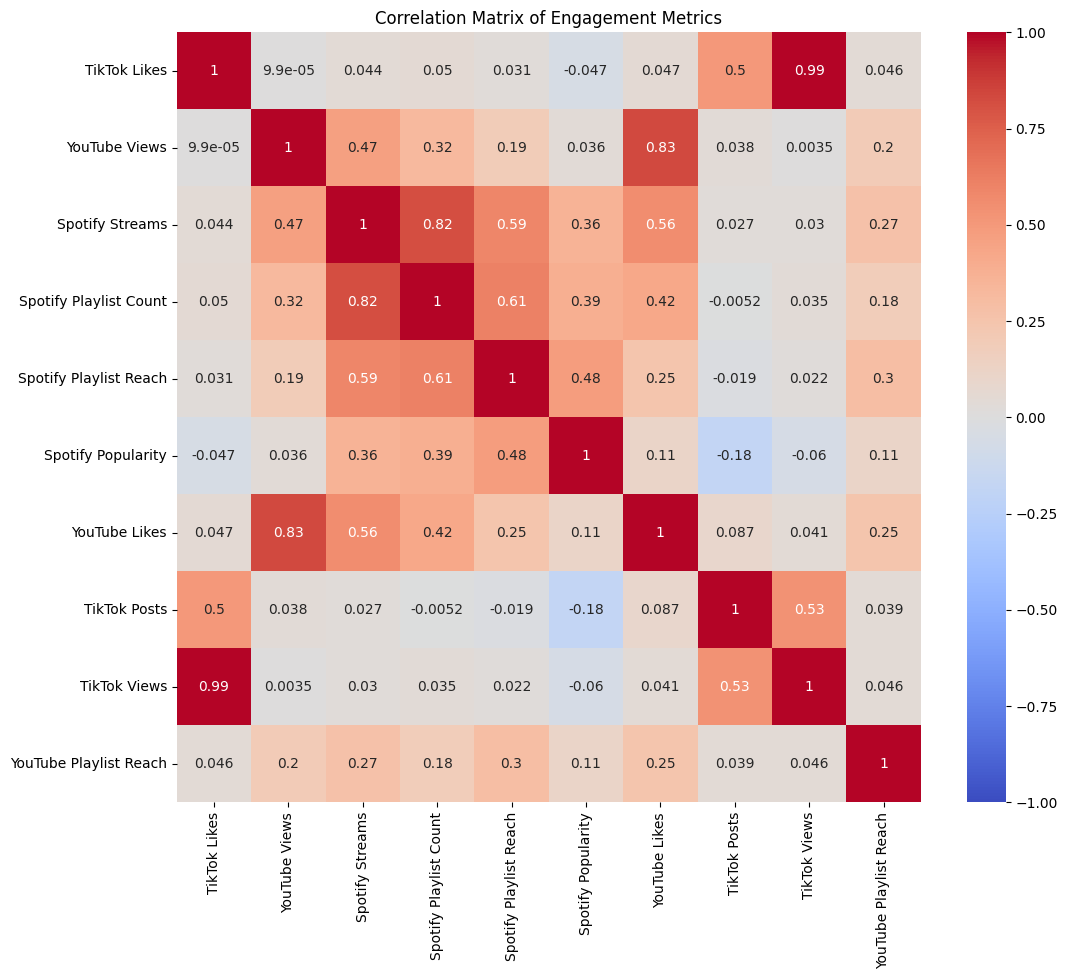

In [171]:
# Select relevant columns
corr_df = most_streamed_df[['TikTok Likes', 'YouTube Views', 'Spotify Streams', 
                            'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 
                            'YouTube Likes', 'TikTok Posts', 'TikTok Views', 'YouTube Playlist Reach']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engagement Metrics')
plt.savefig("images/correlation_matrix_top500.png")
plt.show()


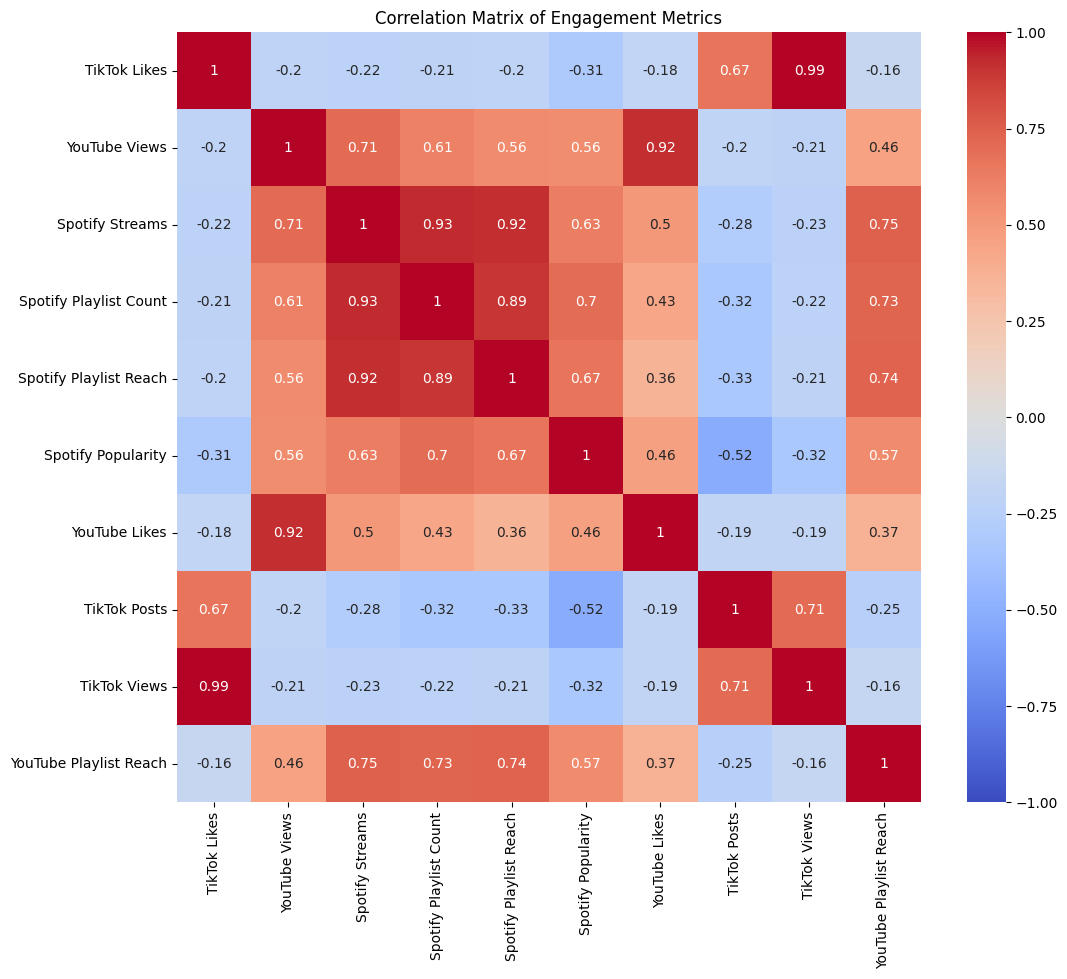

In [172]:
# Select relevant columns
# Select relevant columns
corr_df = most_streamed_df[['TikTok Likes', 'YouTube Views', 'Spotify Streams', 
                            'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 
                            'YouTube Likes', 'TikTok Posts', 'TikTok Views', 'YouTube Playlist Reach']].nlargest(50, 'TikTok Likes')
# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engagement Metrics')
plt.savefig("images/correlation_matrix_top50.png")
plt.show()


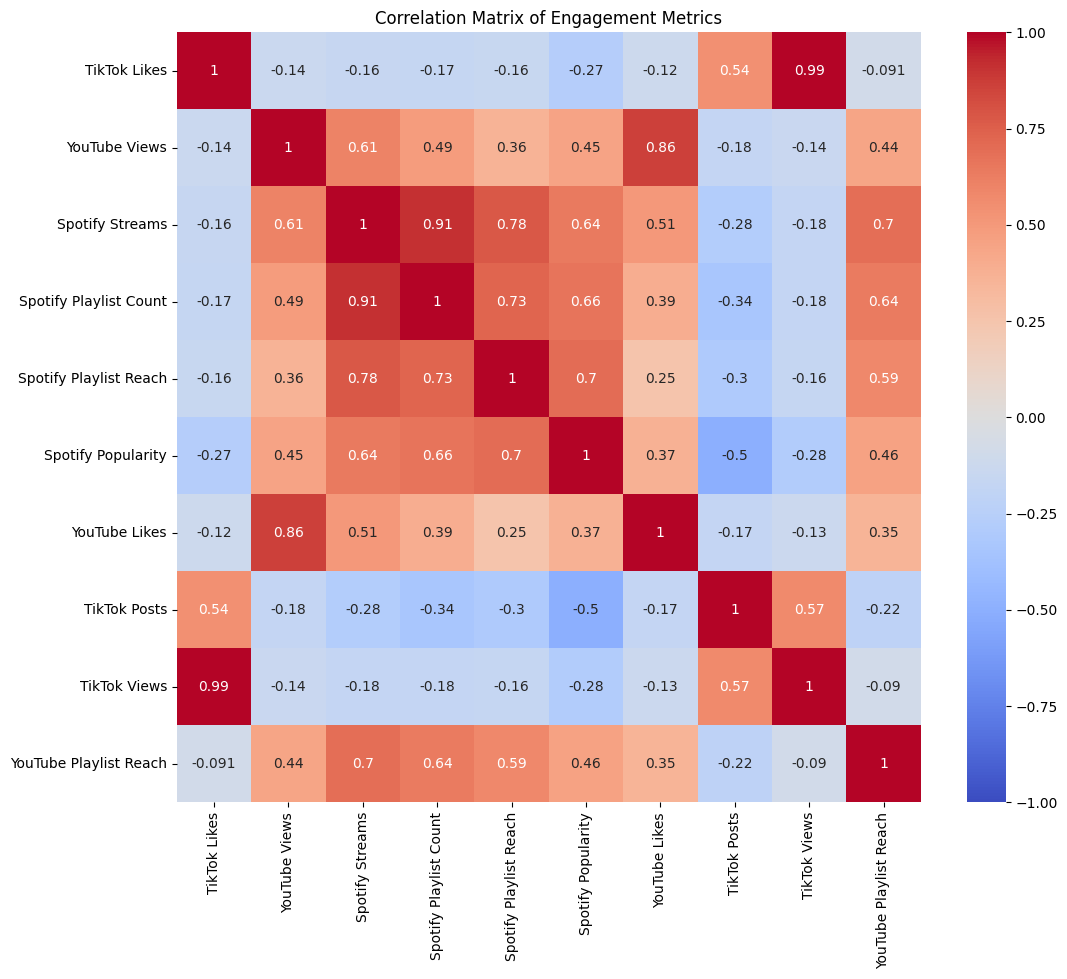

In [ ]:
# Select relevant columns
# Select relevant columns
corr_df = most_streamed_df[['TikTok Likes', 'YouTube Views', 'Spotify Streams', 
                            'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 
                            'YouTube Likes', 'TikTok Posts', 'TikTok Views', 'YouTube Playlist Reach']].nlargest(10, 'TikTok Likes')
# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Engagement Metrics')
plt.savefig("images/correlation_matrix_top10.png")
plt.show()


#### YouTube Likes vs. TikTok Likes

##### Top-500 (in TikTok likes)

**Objective**: Examine if high TikTok likes translate to high YouTube likes.

**Interpretation**: A strong positive correlation would suggest that songs popular on TikTok also receive significant engagement on YouTube, indicating cross-platform appeal.

In [150]:
# Select relevant columns
df = most_streamed_df[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")


Correlation between TikTok Likes and YouTube Likes: 0.04723240471498034


**Scatter Plot with Linear Regression Line**

**Objective**: Visualize the relationship between TikTok likes and YouTube likes, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok likes and YouTube likes. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

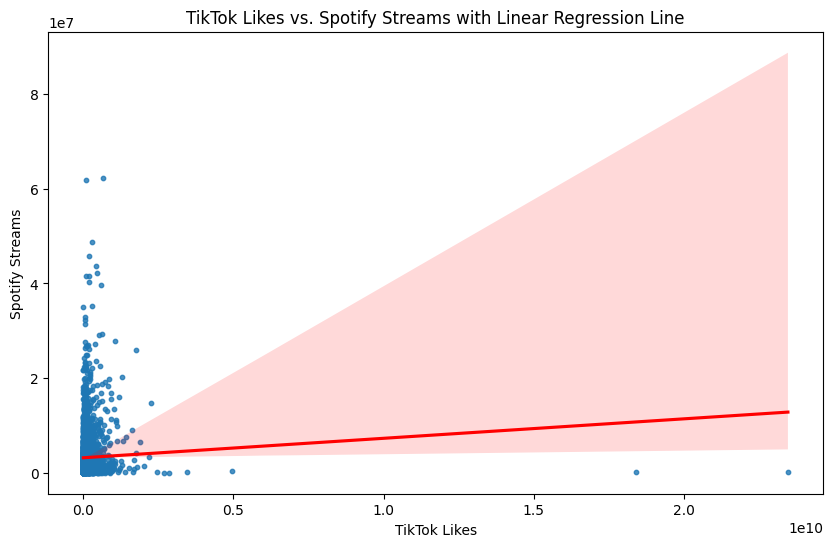

In [140]:
df = most_streamed_df.dropna(subset=['TikTok Likes', 'YouTube Likes'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='TikTok Likes', y='YouTube Likes', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('TikTok Likes')
plt.ylabel('Spotify Streams')
plt.title('TikTok Likes vs. Spotify Streams with Linear Regression Line')
plt.show()

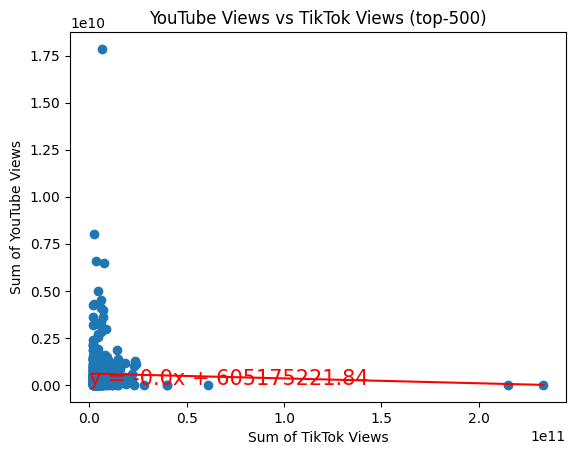

The r^2-value is: 0.0010704166800836227


In [155]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['Sum of TikTok Views']
y_values = top_500_tiktok_df['Sum of YouTube Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of YouTube Views')
plt.title('YouTube Views vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

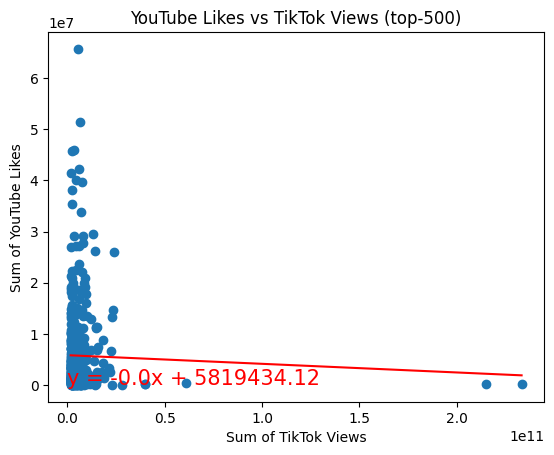

The r^2-value is: 0.0009462905596279089


In [156]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube Likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['Sum of TikTok Views']
y_values = top_500_tiktok_df['Sum of YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of YouTube Likes')
plt.title('YouTube Likes vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

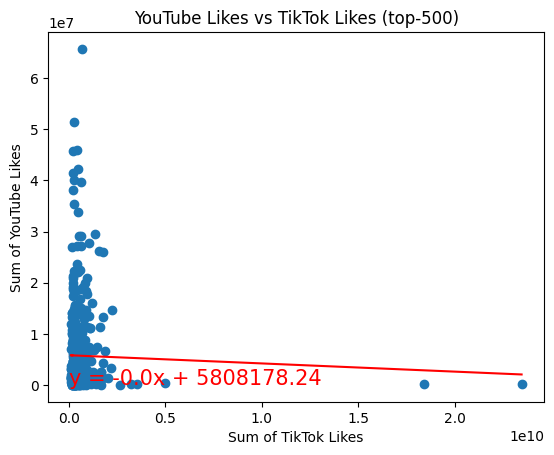

The r^2-value is: 0.0007379585575475491


In [157]:
# YouTube Likes vs TikTok Likes
# Does high TikTok Likes correlate to high YouTube Likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['Sum of TikTok Likes']
y_values = top_500_tiktok_df['Sum of YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('Sum of TikTok Likes')
plt.ylabel('Sum of YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Engagement Ratio Across Platforms**

**Objective**: Calculate the ratio of TikTok likes to Spotify streams and YouTube views to understand cross-platform engagement.

**Interpretation**: These ratios will help identify how TikTok engagement translates to other platforms. Higher ratios may indicate that TikTok is a significant driver of engagement compared to Spotify and YouTube.

In [151]:
# Calculate engagement ratios
most_streamed_df['TikTok_to_YouTube_Likes_Ratio'] = most_streamed_df['TikTok Likes'] / most_streamed_df['YouTube Likes']
most_streamed_df['TikTok_to_YouTube_Views_Ratio'] = most_streamed_df['TikTok Likes'] / most_streamed_df['YouTube Views']

# Display descriptive statistics
print("Descriptive statistics for TikTok to YouTube Likes Ratio:")
print(most_streamed_df['TikTok_to_YouTube_Likes_Ratio'].describe())

print("\nDescriptive statistics for TikTok to YouTube Views Ratio:")
print(most_streamed_df['TikTok_to_YouTube_Views_Ratio'].describe())


Descriptive statistics for TikTok to YouTube Likes Ratio:
count      3528.000000
mean       1288.505874
std       16743.461377
min           0.000002
25%           3.771885
50%          15.787873
75%          62.049733
max      494864.313869
Name: TikTok_to_YouTube_Likes_Ratio, dtype: float64

Descriptive statistics for TikTok to YouTube Views Ratio:
count    3.532000e+03
mean     2.068630e+01
std      3.070485e+02
min      1.022684e-08
25%      2.937292e-02
50%      1.345279e-01
75%      6.136288e-01
max      1.191352e+04
Name: TikTok_to_YouTube_Views_Ratio, dtype: float64


**Discrepancy Analysis: Outliers in Cross-Platform Success**

**Objective**: Identify tracks that perform exceptionally well on one platform but underperform on another.

**Interpretation**: This analysis will highlight tracks that have unusual performance patterns across platforms, such as being a hit on TikTok but not on Spotify or YouTube, or vice versa.

In [152]:
from scipy import stats

# Calculate z-scores for relevant columns
most_streamed_df['TikTok_Likes_Z'] = stats.zscore(most_streamed_df['TikTok Likes'])
most_streamed_df['YouTube_Likes_Z'] = stats.zscore(most_streamed_df['YouTube Likes'])
most_streamed_df['YouTube_Views_Z'] = stats.zscore(most_streamed_df['YouTube Views'])

# Define thresholds for high and low performance (e.g., z > 1.5 for high, z < -1.5 for low)
high_threshold = 1.5
low_threshold = -1.5

# Identify outliers
outliers = most_streamed_df[
    ((most_streamed_df['TikTok_Likes_Z'] > high_threshold) & 
     ((most_streamed_df['YouTube_Likes_Z'] < low_threshold) | 
      (most_streamed_df['YouTube_Views_Z'] < low_threshold))) |
    ((most_streamed_df['TikTok_Likes_Z'] < low_threshold) & 
     ((most_streamed_df['Spotify_Streams_Z'] > high_threshold) | 
      (most_streamed_df['YouTube_Views_Z'] > high_threshold)))
]
outliers.head()
# Display the outliers
# print("Tracks with significant cross-platform performance discrepancies:")
# print(outliers[['Song', 'TikTok Likes', 'Spotify Streams', 'YouTube Views', 'TikTok_Likes_Z', 'Spotify_Streams_Z', 'YouTube_Views_Z']])


,Song,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,Explicit Track,Release Date Ordinal,TikTok_to_Spotify_Ratio,TikTok_to_YouTube_Ratio,TikTok_Likes_Z,Spotify_Streams_Z,YouTube_Views_Z,TikTok_to_YouTube_Likes_Ratio,TikTok_to_YouTube_Views_Ratio,YouTube_Likes_Z


#### Engagement Ratio Across Platforms

**Objective**: Calculate the ratio of TikTok likes to Spotify streams and YouTube views to understand cross-platform engagement.

**Interpretation**: These ratios will help identify how TikTok engagement translates to other platforms. Higher ratios may indicate that TikTok is a significant driver of engagement compared to Spotify and YouTube.

In [ ]:
# Calculate engagement ratios
most_streamed_df['TikTok_to_Spotify_Ratio'] = most_streamed_df['TikTok Likes'] / most_streamed_df['Spotify Streams']
most_streamed_df['TikTok_to_YouTube_Ratio'] = most_streamed_df['TikTok Likes'] / most_streamed_df['YouTube Views']

# Display descriptive statistics
print("Descriptive statistics for TikTok to Spotify Ratio:")
print(most_streamed_df['TikTok_to_Spotify_Ratio'].describe())

print("\nDescriptive statistics for TikTok to YouTube Ratio:")
print(most_streamed_df['TikTok_to_YouTube_Ratio'].describe())


Descriptive statistics for TikTok to Spotify Ratio:
count    3.598000e+03
mean     2.275900e+02
std      8.469907e+03
min      9.212229e-09
25%      2.090615e-02
50%      7.351037e-02
75%      2.980906e-01
max      4.373704e+05
Name: TikTok_to_Spotify_Ratio, dtype: float64

Descriptive statistics for TikTok to YouTube Ratio:
count    3.532000e+03
mean     2.068630e+01
std      3.070485e+02
min      1.022684e-08
25%      2.937292e-02
50%      1.345279e-01
75%      6.136288e-01
max      1.191352e+04
Name: TikTok_to_YouTube_Ratio, dtype: float64


#### Discrepancy Analysis: Outliers in Cross-Platform Success

**Objective**: Identify tracks that perform exceptionally well on one platform but underperform on another.

**Interpretation**: This analysis will highlight tracks that have unusual performance patterns across platforms, such as being a hit on TikTok but not on Spotify or YouTube, or vice versa.

In [124]:
from scipy import stats
import numpy as np

# Calculate z-scores for relevant columns
most_streamed_df['TikTok_Likes_Z'] = stats.zscore(most_streamed_df['TikTok Likes'])
most_streamed_df['Spotify_Streams_Z'] = stats.zscore(most_streamed_df['Spotify Streams'])
most_streamed_df['YouTube_Views_Z'] = stats.zscore(most_streamed_df['YouTube Views'])

# Define thresholds for high and low performance (e.g., z > 1.5 for high, z < -1.5 for low)
high_threshold = 1.5
low_threshold = -1.5

# Identify outliers
outliers = most_streamed_df[
    ((most_streamed_df['TikTok_Likes_Z'] > high_threshold) & 
     ((most_streamed_df['Spotify_Streams_Z'] < low_threshold) | 
      (most_streamed_df['YouTube_Views_Z'] < low_threshold))) |
    ((most_streamed_df['TikTok_Likes_Z'] < low_threshold) & 
     ((most_streamed_df['Spotify_Streams_Z'] > high_threshold) | 
      (most_streamed_df['YouTube_Views_Z'] > high_threshold)))
]
outliers.head()
# Display the outliers
# print("Tracks with significant cross-platform performance discrepancies:")
# print(outliers[['Song', 'TikTok Likes', 'Spotify Streams', 'YouTube Views', 'TikTok_Likes_Z', 'Spotify_Streams_Z', 'YouTube_Views_Z']])


,Song,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track,Release Date Ordinal,TikTok_to_Spotify_Ratio,TikTok_to_YouTube_Ratio,TikTok_Likes_Z,Spotify_Streams_Z,YouTube_Views_Z


#### TikTok Views vs. Spotify Streams - Top 500

##### Scatter Plot with Linear Regression Line

**Objective**: Visualize the relationship between TikTok Views and Spotify Streams, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok Views and Spotify Streams. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

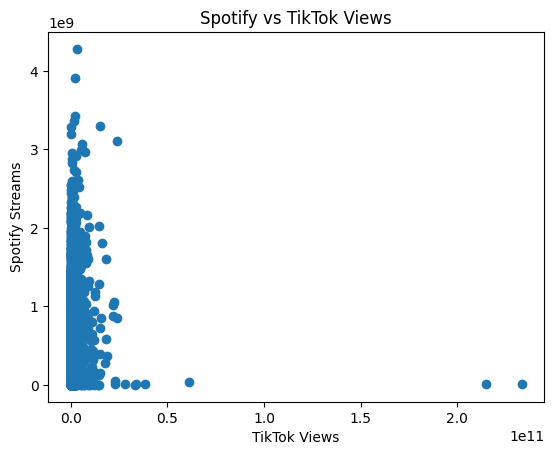

In [126]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?

# Create a scatterplot
# plt.scatter(merged_df['Sum of TikTok Views'], merged_df['Sum of Spotify Streams'])
plt.scatter(most_streamed_df['TikTok Views'], most_streamed_df['Spotify Streams'])
plt.xlabel('TikTok Views')
plt.ylabel('Spotify Streams')
plt.title('Spotify vs TikTok Views')
plt.show()

# this ended up not looking great - going to reduce down to the top 25 instead

##### Boxplots to Compare Engagement Metrics

**Objective**: Use boxplots to compare the distribution of engagement metrics across different categories, such as explicit versus non-explicit tracks.

**Interpretation**: Boxplots will display the median, quartiles, and potential outliers for each metric, allowing you to compare the distribution of engagement metrics between explicit and non-explicit tracks.

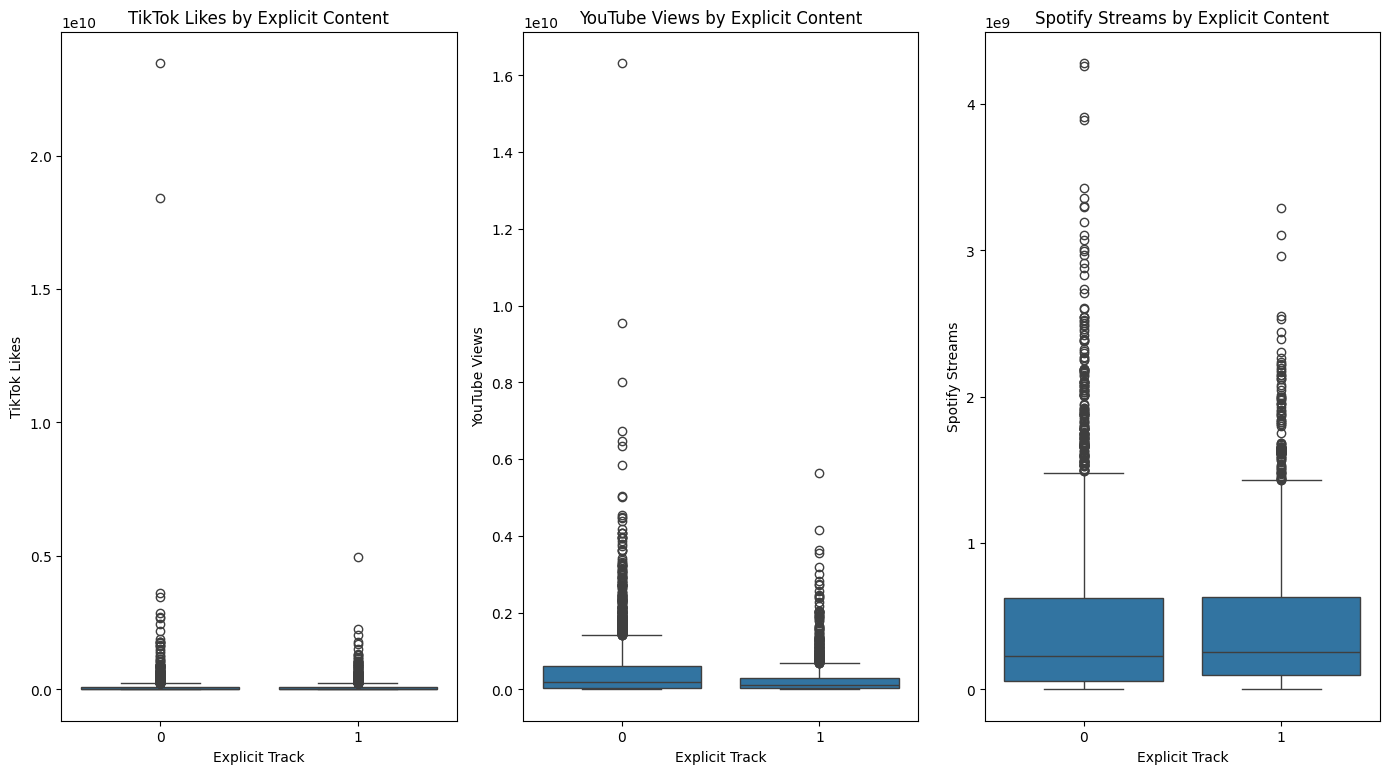

In [141]:
plt.figure(figsize=(14, 8))

# TikTok Likes
plt.subplot(1, 3, 1)
sns.boxplot(x='Explicit Track', y='TikTok Likes', data=most_streamed_df)
plt.title('TikTok Likes by Explicit Content')

# YouTube Views
plt.subplot(1, 3, 2)
sns.boxplot(x='Explicit Track', y='YouTube Views', data=most_streamed_df)
plt.title('YouTube Views by Explicit Content')

# Spotify Streams
plt.subplot(1, 3, 3)
sns.boxplot(x='Explicit Track', y='Spotify Streams', data=most_streamed_df)
plt.title('Spotify Streams by Explicit Content')

plt.tight_layout()
plt.show()



##### Layered Bar Graphs to Show Platform Engagement

**Objective**: Create layered bar graphs to compare cumulative engagement metrics across platforms for top tracks.

**Interpretation**: Layered bar graphs will allow you to compare the cumulative engagement across platforms for the top tracks, highlighting which platforms contribute most to a track's overall engagement.

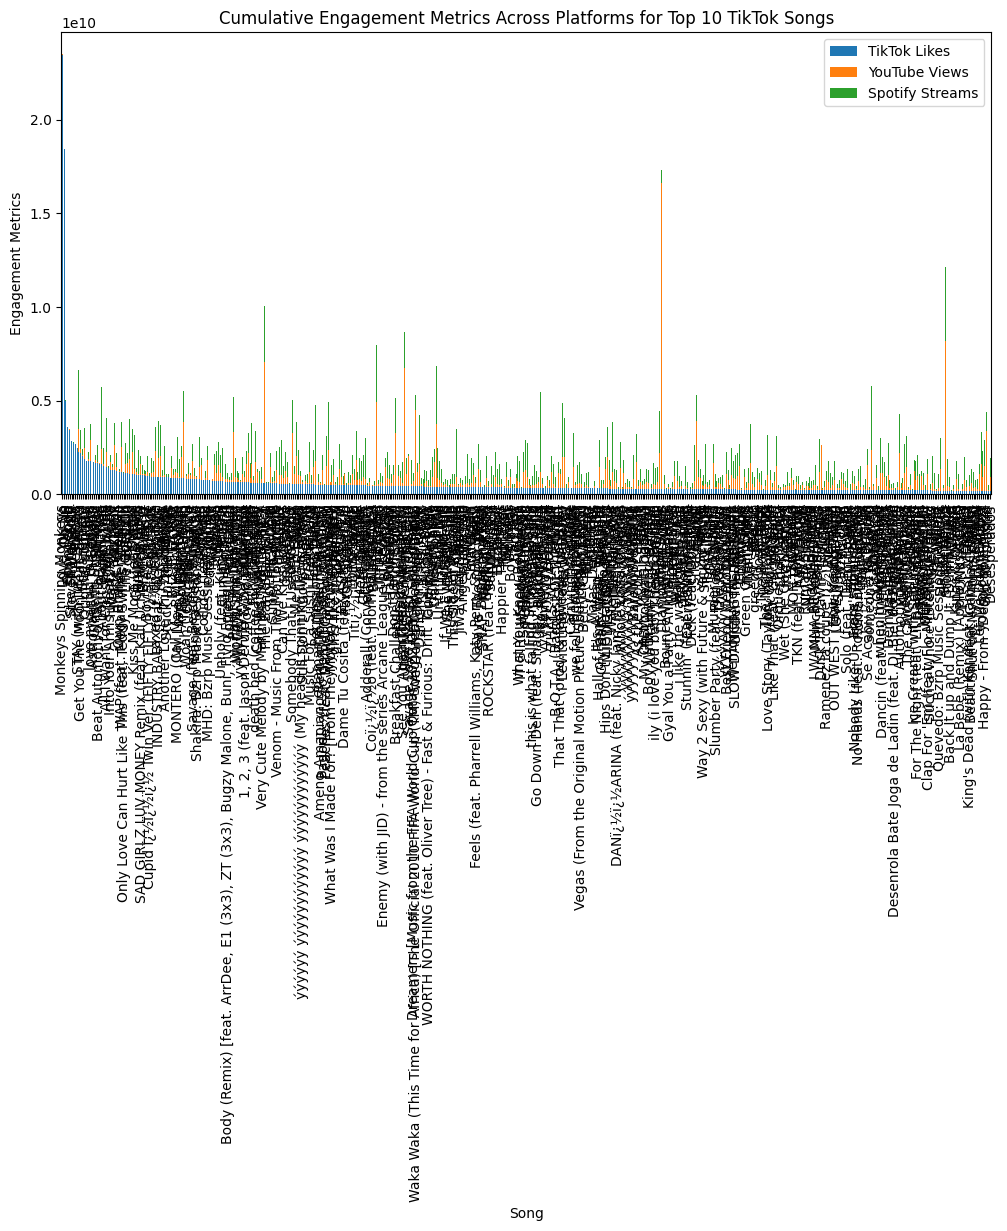

In [147]:
# Select top 10 tracks based on TikTok Likes
top_tracks = most_streamed_df.nlargest(500, 'TikTok Likes')

# Set track names as index
top_tracks.set_index('Song', inplace=True)

# Plot layered bar graph
top_tracks[['TikTok Likes', 'YouTube Views', 'Spotify Streams']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Engagement Metrics')
plt.title('Cumulative Engagement Metrics Across Platforms for Top 10 TikTok Songs')
plt.legend(loc='upper right')
plt.show()


#### TikTok Views vs. Spotify Streams - Top 25

##### Scatter Plot with Linear Regression Line

**Objective**: Visualize the relationship between TikTok Views and Spotify Streams, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok Views and Spotify Streams. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

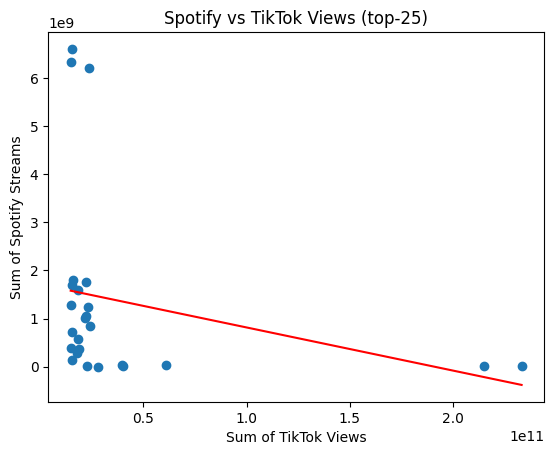

In [ ]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high spotify streams?
# Add the linear regression equation and line to plot
x_values = top_25_tiktok_df['Sum of TikTok Views']
y_values = top_25_tiktok_df['Sum of Spotify Streams']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of Spotify Streams')
plt.title('Spotify vs TikTok Views (top-25)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

##### Layered Bar Graphs to Show Platform Engagement

**Objective**: Create layered bar graphs to compare cumulative engagement metrics across platforms for top tracks.

**Interpretation**: Layered bar graphs will allow you to compare the cumulative engagement across platforms for the top tracks, highlighting which platforms contribute most to a track's overall engagement.

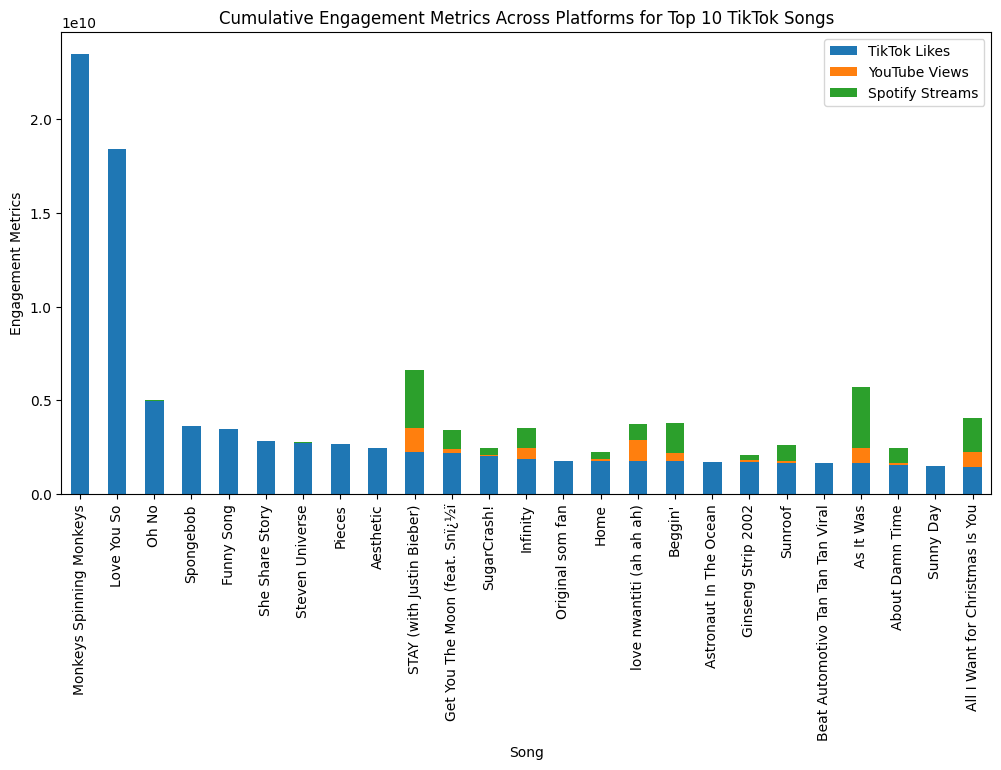

In [148]:
# Select top 10 tracks based on TikTok Likes
top_tracks = most_streamed_df.nlargest(25, 'TikTok Likes')

# Set track names as index
top_tracks.set_index('Song', inplace=True)

# Plot layered bar graph
top_tracks[['TikTok Likes', 'YouTube Views', 'Spotify Streams']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Engagement Metrics')
plt.title('Cumulative Engagement Metrics Across Platforms for Top 10 TikTok Songs')
plt.legend(loc='upper right')
plt.show()


#### TikTok Views vs. Spotify Streams - Top 10

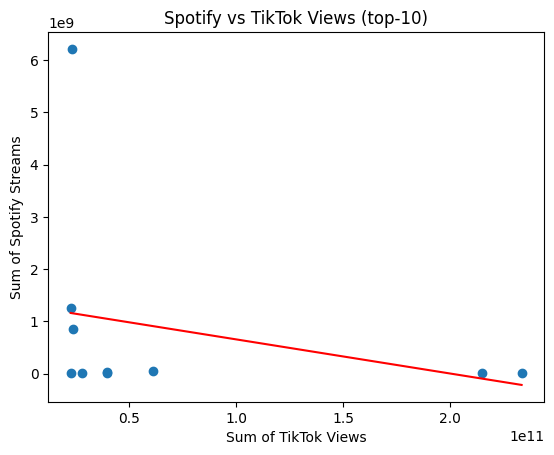

The r^2-value is: 0.07605580706473422


In [131]:
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df["Sum of TikTok Views"]
y_values = top_10_tiktok_df["Sum of Spotify Streams"]

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of Spotify Streams")
plt.title("Spotify vs TikTok Views (top-10)")

plt.show()

print(f"The r^2-value is: {rvalue**2}")

(0.0, 256555542609.30002)

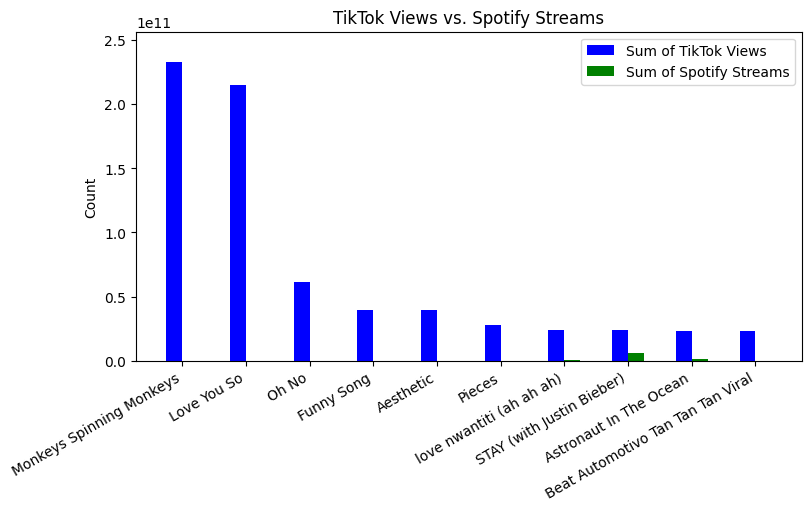

In [132]:
# Prepare the bar chart
x = np.arange(len(top_10_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')   # constrained to prevent overlap

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_10_tiktok_df['Sum of TikTok Views'], width, label='Sum of TikTok Views', color='blue')
spotify_bar = ax.bar(x+width/2, top_10_tiktok_df['Sum of Spotify Streams'], width, label='Sum of Spotify Streams', color='green')

# Formatting
ax.set_ylabel('Count')
ax.set_title('TikTok Views vs. Spotify Streams')
ax.set_xticks(x)
ax.set_xticklabels(top_10_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

max_value = max(top_10_tiktok_df['Sum of Spotify Streams'].max(), top_10_tiktok_df['Sum of TikTok Views'].max())
ax.set_ylim(0, max_value * 1.1)          # Set y-limit slightly above max value


In [133]:
# Calculate correlation between TikTok views and Spotify streams
correlation_tiktok_spotify = merged_df['Sum of TikTok Views'].corr(merged_df['Sum of Spotify Streams'])
print(f'Correlation between TikTok Views and Spotify Streams: {correlation_tiktok_spotify}')

# Calculate correlation between TikTok likes and YouTube views
correlation_tiktok_youtube = merged_df['Sum of TikTok Likes'].corr(merged_df['Sum of YouTube Views'])
print(f'Correlation between TikTok Likes and YouTube Views: {correlation_tiktok_youtube}')

Correlation between TikTok Views and Spotify Streams: 0.9964516150503945
Correlation between TikTok Likes and YouTube Views: 0.996487994841728


#### YouTube Views vs. TikTok Views - Top 10

##### Scatter Plot with Linear Regression Line

**Objective**: Visualize the relationship between TikTok Views and Spotify Streams, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok Views and Spotify Streams. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

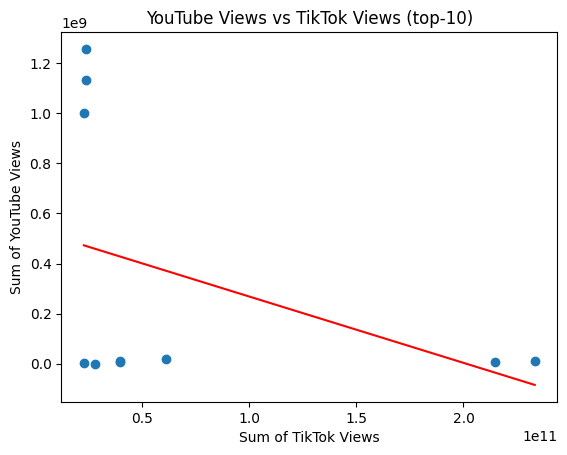

The r^2-value is: 0.15748685788104752


In [136]:
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df["Sum of TikTok Views"]
y_values = top_10_tiktok_df["Sum of YouTube Views"]

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of YouTube Views")
plt.title("YouTube Views vs TikTok Views (top-10)")

plt.show()

print(f"The r^2-value is: {rvalue**2}")

(0.0, 256555542609.30002)

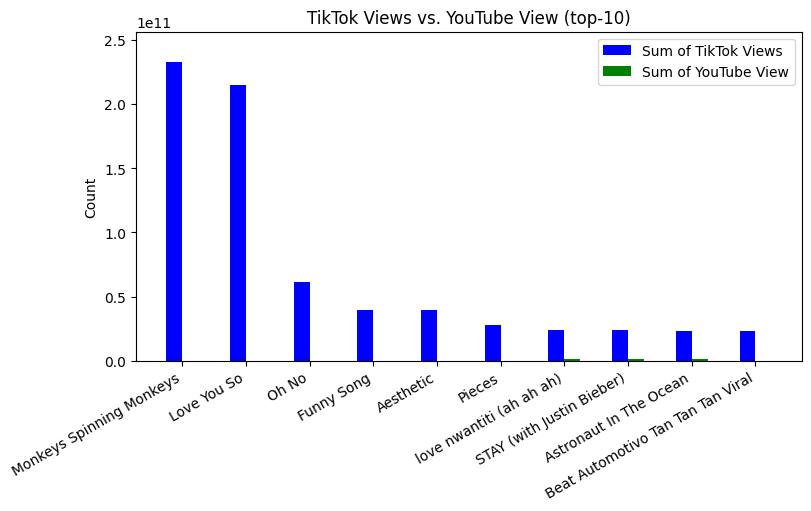

In [137]:
# Prepare the bar chart
x = np.arange(len(top_10_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')   # constrained to prevent overlap

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_10_tiktok_df['Sum of TikTok Views'], width, label='Sum of TikTok Views', color='blue')
spotify_bar = ax.bar(x+width/2, top_10_tiktok_df['Sum of YouTube Views'], width, label='Sum of YouTube View', color='green')

# Formatting
ax.set_ylabel('Count')
ax.set_title('TikTok Views vs. YouTube Views (top-10)')
ax.set_xticks(x)
ax.set_xticklabels(top_10_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

max_value = max(top_10_tiktok_df['Sum of YouTube Views'].max(), top_10_tiktok_df['Sum of TikTok Views'].max())
ax.set_ylim(0, max_value * 1.1)          # Set y-limit slightly above max value


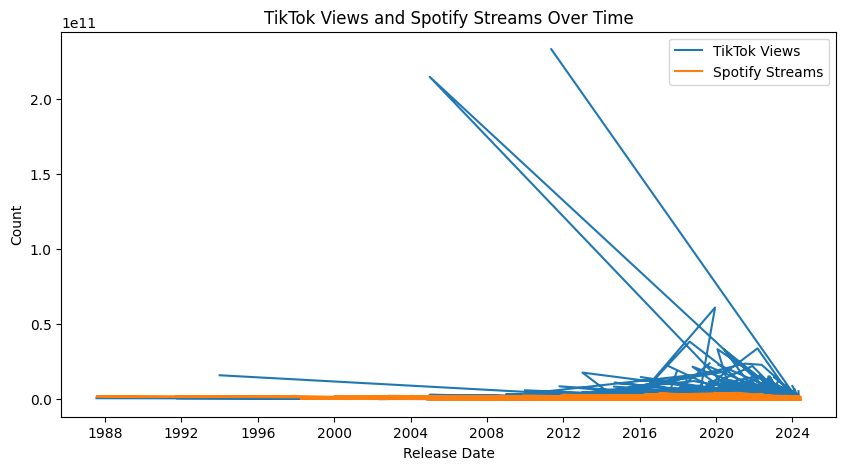

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10
5,Aesthetic,3.206991e+09,175081.0,44.0,114,33025746.0,6658234.0,3.985063e+10


In [ ]:
# Plot trends of TikTok views and Spotify streams based on the song's release date
plt.figure(figsize=(10, 5))
plt.plot(most_streamed_df['Release Date'], most_streamed_df['TikTok Views'], label='TikTok Views')
plt.plot(most_streamed_df['Release Date'], most_streamed_df['Spotify Streams'], label='Spotify Streams')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.title('TikTok Views and Spotify Streams Over Time')
plt.legend()
plt.show()

merged_df.head()

                                 Song  Sum of TikTok Views  \
0            Monkeys Spinning Monkeys         2.332323e+11   
1                         Love You So         2.148440e+11   
2                               Oh No         6.108856e+10   
4                          Funny Song         3.994631e+10   
5                           Aesthetic         3.985063e+10   
8                              Pieces         2.803270e+10   
15           love nwantiti (ah ah ah)         2.393338e+10   
9           STAY (with Justin Bieber)         2.371238e+10   
17             Astronaut In The Ocean         2.315675e+10   
20  Beat Automotivo Tan Tan Tan Viral         2.291866e+10   

    Sum of Spotify Streams  
0             1.147748e+07  
1             1.632663e+07  
2             4.028412e+07  
4             5.866282e+06  
5             3.302575e+07  
8             5.467217e+06  
15            8.534514e+08  
9             6.214201e+09  
17            1.251676e+09  
20            7.382759e+06 

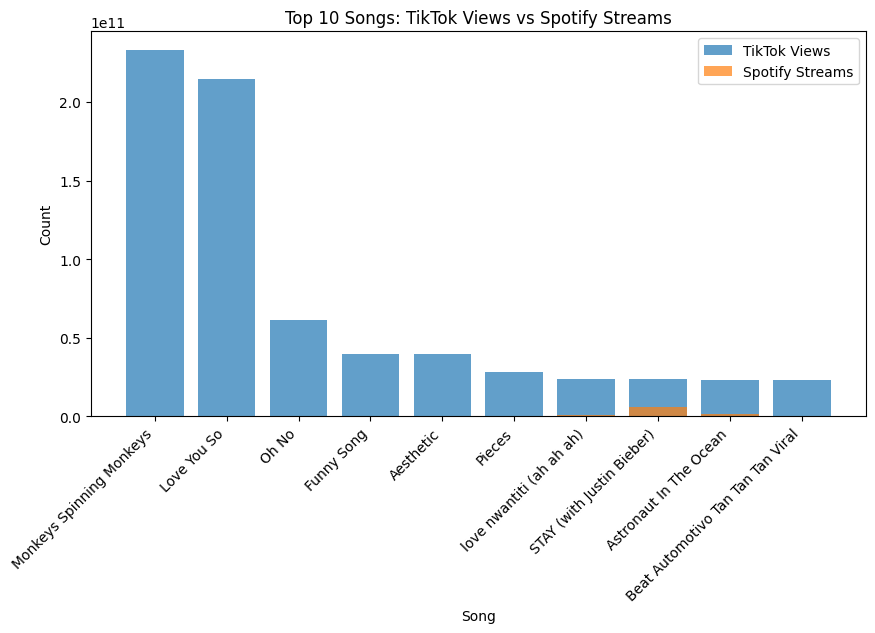

In [139]:
# Identify top 10 songs with highest TikTok views
top_10_tiktok_views = merged_df[merged_df['Song'] != 'Grand Total'].nlargest(10, 'Sum of TikTok Views')

# Display top 10 songs with their TikTok views and Spotify streams
print(top_10_tiktok_views[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']])

# Plot bar chart for top 10 songs
plt.figure(figsize=(10, 5))
plt.bar(top_10_tiktok_views['Song'], top_10_tiktok_views['Sum of TikTok Views'], label='TikTok Views', alpha=0.7)
plt.bar(top_10_tiktok_views['Song'], top_10_tiktok_views['Sum of Spotify Streams'], label='Spotify Streams', alpha=0.7)
plt.xlabel('Song')
plt.ylabel('Count')
plt.title('Top 10 Songs: TikTok Views vs Spotify Streams')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()